<a href="https://colab.research.google.com/github/hughes28/PokemonCNN2DClassifier/blob/master/PokemonCNN2DClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First 150 Pokemon Classifier: Data Preparation

## Get Pokemon dataset from Kaggle

In [1]:
# Use exclamation points to trigger CMD actions
!pip install kaggle # Install Kaggle into the environment
!mkdir .kaggle # Create directory .kaggle file
!ls -a # Check directory to ensure it is there
!mv .kaggle /root/ # Move .kaggle file to /root/ folder

import os # Allows access to folder locations
import shutil # Used for deleting directories to save space

# Deletes previous datasets if restarting notebook
# Deletes any previous zip files in Files under content
if os.path.exists('/content/pokemon/'):
    shutil.rmtree('/content/pokemon/')

import json # Used to put token information into .kaggle file

# Ensure token is in dictionary form with your username and key from Kaggle
token = {"username":"YOUR_USERNAME_HERE", "key":"YOUR_KEY_HERE"}

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file) # Dump token information into .kaggle file

!chmod 600 /root/.kaggle/kaggle.json # Safely connect to API

# Download the Pokemon dataset
!kaggle datasets download -d brkurzawa/original-150-pokemon-image-search-results

.  ..  .config	foo.csv  .kaggle  model.h5  pokemon  sample_data
mv: cannot move '.kaggle' to '/root/.kaggle': Directory not empty
100% 20.3G/20.3G [07:09<00:00, 47.9MB/s]
100% 20.3G/20.3G [07:09<00:00, 50.8MB/s]


## Unzip and retrieve data

In [2]:
from zipfile import ZipFile # Used to unzip file 

with ZipFile('/content/original-150-pokemon-image-search-results.zip', 'r') as zipObj:
    # Get a list of all archived file names from the zip file
    listOfFileNames = zipObj.namelist()
    # Iterate over the file names
    for fileName in listOfFileNames:
        # Check filename ends with .jpg, .jpeg, or .png
        if fileName.endswith('.jpg') or fileName.endswith('.png') or fileName.endswith('.jpeg'):
            # Extract a single file from zip
            zipObj.extract(fileName, '/content')

# An additional dataset is downloaded with the zip file in error
# /content/pokemon/pokemon/ is the relevant dataset
# This searches through the folders in /content/pokemon/ and deletes other folders
directory = '/content/pokemon/'
for folderFileName in os.listdir(directory):
    if not folderFileName.endswith('pokemon'):
        shutil.rmtree(os.path.join(directory + folderFileName))

# Delete the original zip file to free up room
os.remove('/content/original-150-pokemon-image-search-results.zip')

## Get information on full dataset

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Total number of species of Pokemon: 151
Total number of images in full dataset: 34060


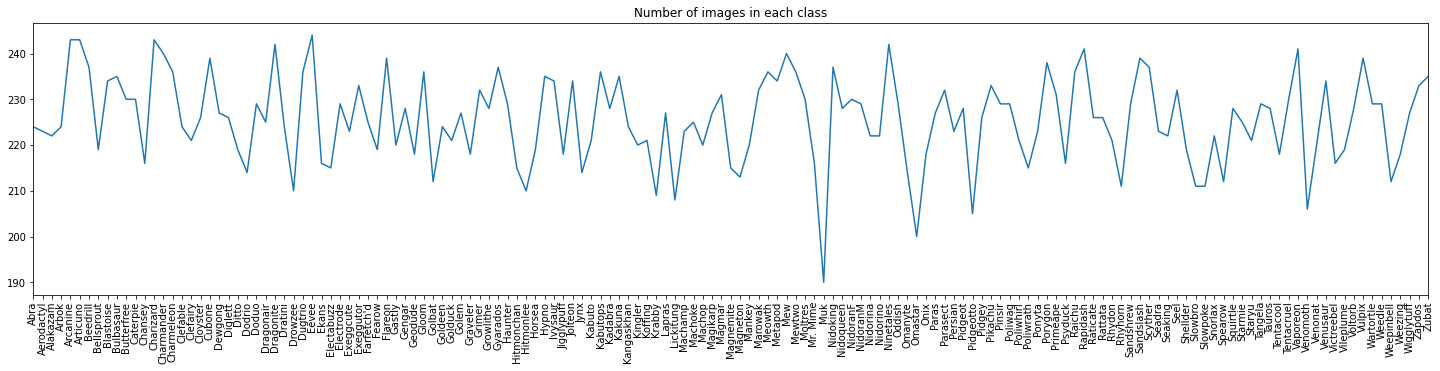

In [3]:
import seaborn as sns # Data visualization
import matplotlib.pyplot as plt # Data visualization
path = '/content/pokemon/pokemon' # Path to directory which contains classes
classes = os.listdir(path) # List of all classes
print(f'Total number of species of Pokemon: {len(classes)}')

# Count the number of images in each folder and sum them all up
counts = {}
for c in classes:
    counts[c] = len(os.listdir(os.path.join(path, c)))

print(f'Total number of images in full dataset: {sum(list(counts.values()))}')

# Number of images in each class plot
fig = plt.figure(figsize = (25, 5))
sns.lineplot(x = list(counts.keys()), y = list(counts.values())).set_title('Number of images in each class')
plt.xticks(rotation = 90)
plt.margins(x=0)
plt.show()

## Clean dataset

In [4]:
import cv2 as cv # Image manipulation

# Not all classes will be used because Google Colab doesn't have enough RAM
# In addition, more classes == harder time distinguishing Pokemon
# We want to be able to run this entire notebook without having it crash
# Sort "counts" dictionary and select top 50 classes with greatest number of images
# Save this as "rep_classes", or represented classes for our model
rep_classes = sorted(counts.items(), key = lambda x: x[1], reverse = True)[:50]
print(rep_classes)

# Extract labels and save for later
rep_classes = [i[0] for i in rep_classes]
print(rep_classes)

# Set a length and width for the resizing of images
# Will be used to resize training/testing set AND validation set 
length = 128
width = 128

X = [] # List for images
Y = [] # List for labels

# Loop through all classes
for c in classes:
    # We take only classes that we defined in 'rep_classes' list
    if c in rep_classes:
        dir_path = os.path.join(path, c)
        label = rep_classes.index(c) # Our label is an index of class in 'rep_classes' list
        
        # Reading, resizing and adding image and label to lists
        for i in os.listdir(dir_path):
            image = cv.imread(os.path.join(dir_path, i))
            
            try:
                resized = cv.resize(image, (length, width)) # Resizing images
                X.append(resized)
                Y.append(label)
            
            # The image is skipped if it cannot be read
            except:
                print(os.path.join(dir_path, i), '[ERROR] can\'t read the file')
                continue       
            
print('DONE')

[('Eevee', 244), ('Charizard', 243), ('Arcanine', 243), ('Articuno', 243), ('Ninetales', 242), ('Dragonite', 242), ('Vaporeon', 241), ('Rapidash', 241), ('Mew', 240), ('Charmander', 240), ('Cubone', 239), ('Vulpix', 239), ('Flareon', 239), ('Sandslash', 239), ('Porygon', 238), ('Nidoking', 237), ('Beedrill', 237), ('Gyarados', 237), ('Scyther', 237), ('Charmeleon', 236), ('Meowth', 236), ('Dugtrio', 236), ('Mewtwo', 236), ('Raichu', 236), ('Gloom', 236), ('Kabutops', 236), ('Kakuna', 235), ('Bulbasaur', 235), ('Zubat', 235), ('Hypno', 235), ('Ivysaur', 234), ('Metapod', 234), ('Blastoise', 234), ('Venusaur', 234), ('Jolteon', 234), ('Exeggutor', 233), ('Pikachu', 233), ('Zapdos', 233), ('Marowak', 232), ('Seel', 232), ('Grimer', 232), ('Parasect', 232), ('Primeape', 231), ('Magmar', 231), ('Tentacruel', 230), ('NidoranF', 230), ('Butterfree', 230), ('Caterpie', 230), ('Moltres', 230), ('Oddish', 229)]
['Eevee', 'Charizard', 'Arcanine', 'Articuno', 'Ninetales', 'Dragonite', 'Vaporeon', 

## Convert list with images to Numpy array and reshape it

In [5]:
!pip uninstall -y tensorflow # Uninstall/reinstall TF to prevent errors
!pip install -q tensorflow # Installs TF to environment
%tensorflow_version 2.x
import tensorflow as tf 
import numpy as np # Array manipulation

# Reshape array into 4-D as that's what Conv2D accepts
X = np.array(X).reshape(-1, length, width, 3)

# Scaling data in array
X = X / 255.0

# Creates numerical categories for our shortened class array
y = tf.keras.utils.to_categorical(Y, num_classes=len(rep_classes))

# Split dataset into training/testing datasets
# Although training set will give accuracy, random pictures from e926 will be used to extract percent match.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.1, stratify = y, shuffle = True, random_state = 666)

Uninstalling tensorflow-2.2.0:
  Successfully uninstalled tensorflow-2.2.0


## Do training

In [6]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
!pip install -q pyyaml h5py # Ability to download the actual model

# Determines output layer size (just number of output nodes that represent
# individual probabilities of each class)
K = len(rep_classes) 

# Input layer initialization (shape is merely shape of input image)
i = Input(shape=X_train[0].shape)

# No strided convolutions are used as the images are relatively small
# Same padding is used to ensure the image isnt shrunk and unable to be processed further
# Dropout is normally used but had no effect with this dataset so it's removed

# Outline of each convolution layer:
# Conv2D
# Batch normalization
# Conv2D
# Batch normalization
# Max pooling

# Each layer is plugged into another

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(1024, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(1024, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(2048, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(2048, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Flatten()(x) # Converts to flat feature vector
x = Dense(2048, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(K, activation='softmax')(x) # Output layer with indiv. probabilities

model = Model(i, x)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 30, # Degree range for random rotations
    zoom_range = 0.7, # Range for random zoom 
    horizontal_flip = True, # Randomly flip inputs horizontally
    width_shift_range = 0.7, # Range for horizontal shift 
    height_shift_range = 0.7, # Range for vertical shift 
    shear_range = 0.5, # Shear intensity
    fill_mode='nearest')  
train_generator = data_generator.flow(X_train, Y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size 
r = model.fit_generator(
    train_generator,
    validation_data=(X_test, Y_test),
    steps_per_epoch=steps_per_epoch,
    epochs=500)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/500
326/326 [==============================] - 40s 124ms/step - loss: 3.9072 - accuracy: 0.0370 - val_loss: 3.9393 - val_accuracy: 0.0275
Epoch 2/500
326/326 [==============================] - 39s 119ms/step - loss: 3.6941 - accuracy: 0.0435 - val_loss: 3.5812 - val_accuracy: 0.0490
Epoch 3/500
326/326 [==============================] - 39s 119ms/step - loss: 3.6439 - accuracy: 0.0502 - val_loss: 4.6310 - val_accuracy: 0.0456
Epoch 4/500
326/326 [==============================] - 39s 119ms/step - loss: 3.5766 - accuracy: 0.0562 - val_loss: 3.3995 - val_accuracy: 0.0800
Epoch 5/500
326/326 [==============================] - 38s 118ms/step - loss: 3.5197 - accuracy: 0.0748 - val_loss: 3.5287 - val_accuracy: 0.0765
Epoch 6/500
326/326 [==============================] - 39s 118ms/step - loss: 3.4589 - accuracy: 0.0838 - val_loss: 3.5404 - val_accuracy: 0.1092
Epoch 7/500
326/326 [===========================

Text(0.5, 1.0, 'loss')

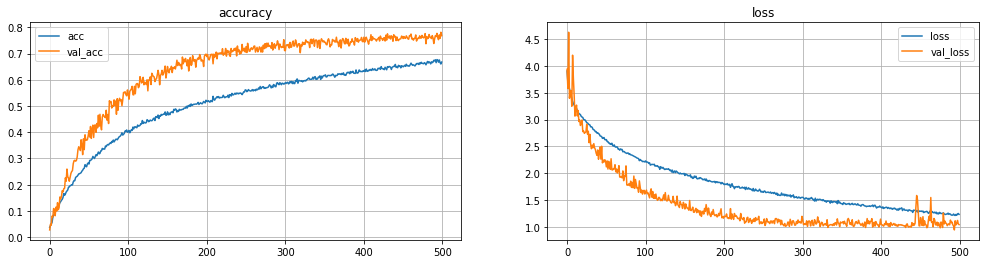

In [7]:
# Plot accuracy/val_accuracy and loss/val_loss
fig = plt.figure(figsize = (17, 4))
    
# Pull accuracy, val_accuracy, loss, and val_loss data from r.history

plt.subplot(121)
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.grid()
plt.title(f'accuracy')

plt.subplot(122)
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.grid()
plt.title(f'loss')

## Download classes in CSV for future need if necessary along with model

In [8]:
import pandas as pd
pd.DataFrame(rep_classes).to_csv('/content/foo.csv', header=None, index=None)

# Saves model in h5 format
model.save('model.h5')

## Get test data

Top 50 Classes:
1: Eevee
2: Charizard
3: Arcanine
4: Articuno
5: Ninetales
6: Dragonite
7: Vaporeon
8: Rapidash
9: Mew
10: Charmander
11: Cubone
12: Vulpix
13: Flareon
14: Sandslash
15: Porygon
16: Nidoking
17: Beedrill
18: Gyarados
19: Scyther
20: Charmeleon
21: Meowth
22: Dugtrio
23: Mewtwo
24: Raichu
25: Gloom
26: Kabutops
27: Kakuna
28: Bulbasaur
29: Zubat
30: Hypno
31: Ivysaur
32: Metapod
33: Blastoise
34: Venusaur
35: Jolteon
36: Exeggutor
37: Pikachu
38: Zapdos
39: Marowak
40: Seel
41: Grimer
42: Parasect
43: Primeape
44: Magmar
45: Tentacruel
46: NidoranF
47: Butterfree
48: Caterpie
49: Moltres
50: Oddish


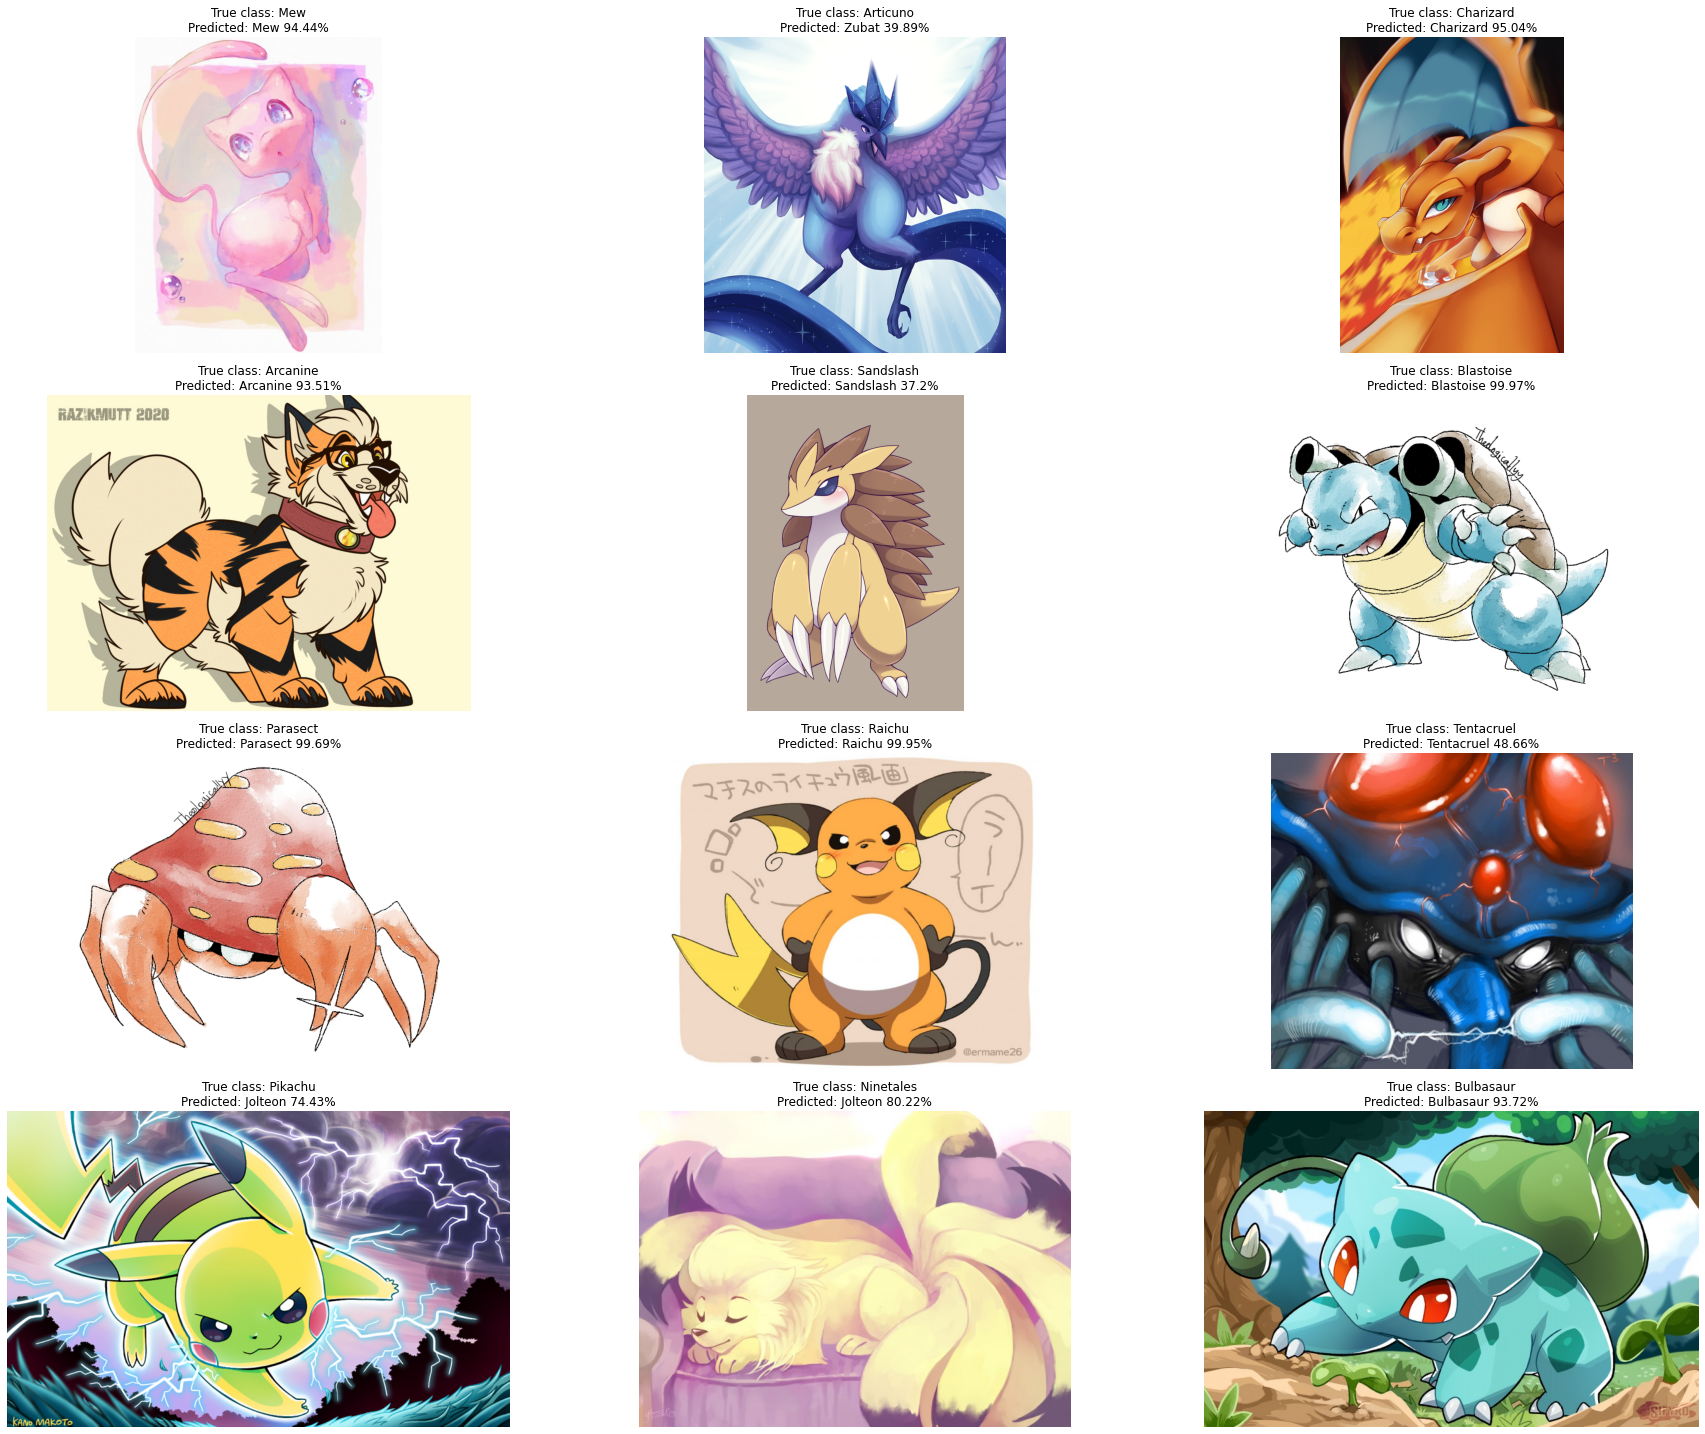

In [9]:
import requests # Allows downloading of pictures from online sources

# Links to a bunch of pictures (most likely not in dataset)
# of fanart pictures from e926.net to test the model with
# Only doing a few to not crowd the output with 50 pictures

print(f'Top {len(rep_classes)} Classes:')
for i, rep_class in enumerate(rep_classes):
  print(f'{i+1}: {rep_class}')

# Regular Pokemon
Mew = ['Mew', 'https://static1.e926.net/data/sample/04/7c/047cc1dc24294e4e968dbdfd9ae3cda3.jpg']
Articuno = ['Articuno', 'https://static1.e926.net/data/44/7d/447d2a33eed64f267c5e62818f8d3c45.png']
Charizard = ['Charizard', 'https://static1.e926.net/data/52/fd/52fd8fdee04f43d36aa5a36e1ebaa7fa.png']
Arcanine = ['Arcanine', 'https://static1.e926.net/data/sample/02/83/02836015d981bc2d3b1e5f3107052e04.jpg']
Sandslash = ['Sandslash', 'https://static1.e926.net/data/c2/8f/c28f531f313e74dd52c284c8f35d99d6.png']
Blastoise = ['Blastoise', 'https://static1.e926.net/data/51/d4/51d43b990ad00897b51030cceb1bacd3.png']
Parasect = ['Parasect', 'https://static1.e926.net/data/d8/71/d871cd96f6a113ad957310acaf56614e.png']
Raichu = ['Raichu', 'https://static1.e926.net/data/sample/68/06/680697d4ae5aaca1e56877240797cc50.jpg']
Tentacruel = ['Tentacruel', 'https://static1.e926.net/data/sample/77/59/775970efa618f299e45db69a8e5c138a.jpg']

# Challenging pictures (e.g. different color backgrounds, accessories, etc)
Pikachu = ['Pikachu', 'https://static1.e926.net/data/15/b4/15b437918c37a5809555f46ca572a5d8.jpg']
Ninetales = ['Ninetales', 'https://static1.e926.net/data/sample/bb/2c/bb2ce492b5731f394f15bbece0b7b162.jpg']
Bulbasaur = ['Bulbasaur', 'https://static1.e926.net/data/sample/5a/51/5a517cde82579bab2f6e0e67e5bf49cd.jpg']

# Listed in order of how they appear in imbalanced
# Only testing a few in comparison to not overload with pictures in output
test_df = [Mew, 
           Articuno, 
           Charizard, 
           Arcanine, 
           Sandslash, 
           Blastoise,
           Parasect,
           Raichu,
           Tentacruel,
           Pikachu,
           Ninetales,
           Bulbasaur]

# Lists to store validation data and index label
val_x = []
val_y = []

for data in test_df:
    r = requests.get(data[1], stream=True).raw
    image = np.asarray(bytearray(r.read()), dtype="uint8")
    image = cv.imdecode(image, cv.IMREAD_COLOR)
    val_x.append(image)
    
    if data[0] in rep_classes:
        val_y.append(rep_classes.index(data[0]))
    else:
        print("ERROR: Pokemon not in list.")

rows = 5
cols = 3

fig = plt.figure(figsize = (25, 25))

for i, j in enumerate(zip(val_x, val_y)): # i - for subplots
    orig = j[0] # Original, not resized image
    label = j[1] # Label for that image
    
    image = cv.resize(orig, (length, width)) # Resizing image 
    image = image.reshape(-1, length, width, 3) / 255.0 # Reshape and scale resized image
    preds = model.predict(image) # Predicting image
    pred_class = np.argmax(preds) # Defining predicted class
    
    true_label = f'True class: {rep_classes[label]}'
    pred_label = f'Predicted: {rep_classes[pred_class]} {round(preds[0][pred_class] * 100, 2)}%'
    
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(orig[:, :, ::-1])
    plt.title(f'{true_label}\n{pred_label}')
    plt.axis('off')
    
plt.tight_layout()

## Data conclusions

### The model was able to classify most of the first set easily when a neutral-colored or similarly-colored background was in the picture. However, different colored backgrounds with complex features in the background caused misclassifications for two of the Pokemon (Pikachu, Ninetales) and lower certainty for Bulbasaur.

## Future work

### This model relies heavily on picture colors for classification; because the background adds additional "noise" to the model, further image processing using bitwise_and and/or bitwise_or masking would allow the background colors to be eliminated and hopefully improving the accuracy further to the point of being able to add more classes to the model.